# Máxima verosimilitud y ajuste polinómico

In [1]:
from functions1 import *
%load_ext autoreload
%autoreload 2

In [2]:
# import data pkl file
df = pd.read_pickle('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/toy_dataset.pkl')

## 1.
Se busca ajustar un modelo de regresión polinómico $\hat{y}(x,\bold{w})$ de grado $M$:

$$
\hat{y}(x,\bold{w}) = \sum_{j=0}^M w_j \phi _j(x)
$$
donde $M$ es el grado máximo del polinomio y $\phi _j(x) = x^j$. Por lo que:

$$
\hat{y}(x,\bold{w}) = \sum_{j=0}^M w_j x^j
$$

### a) 
Derivar las ecuaciones para determinar los parámetros óptimos $\bold{w}^∗$ aplicando el principio de máxima verosimilitud, asumiendo que las muestras son independientes e identicamente distribuidas con un ruido Gaussiano $N(0,σ^2)$. Demostrar que $\bold{w}^∗$ es el óptimo global, que maximiza globalmente la verosimilitud (probabilidad conjunta) de los datos de entrenamiento.

     target  input_feature
0  1.032609      -0.250920
1  1.133085       0.901429


Text(0, 0.5, 'Target')

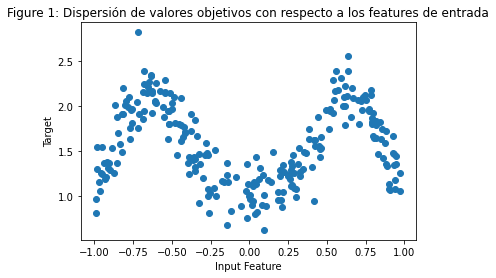

In [3]:
df.rename(columns={'taret': 'target'}, inplace=True)
print(df.head(2))
plt.scatter(df['input_feature'], df['target'])
plt.title('Figure 1: Dispersión de valores objetivos con respecto a los features de entrada')
plt.xlabel('Input Feature')
plt.ylabel('Target')


En el caso dado tenemos que:
$$
y_j = \hat{y}(x_j, \bold{w})+e_N
$$

Donde $\hat{y}$ corresponde al modelo de regresión y $e_N$ es el error (o ruido) de distribución gaussiana.

Considerando esto, la función de verosimilitud es de la siguiente manera:
$$
L(\boldsymbol{w}) = \prod_{j=1}^{M} p(y_j | x_j, \boldsymbol{w}) = \prod_{j=1}^{M} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y_j - \hat{y}(x_j, \boldsymbol{w}))^2}{2\sigma^2}} 
$$

Para calcular el $\boldsymbol{w}^*$ tomo el logaritmo natural de la verosimilitud para simplificar el cálculo.
$$
\ln \ L(\boldsymbol{w}) = \sum_{j=1}^{M} \ln ( \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y_j - \hat{y}(x_j, \boldsymbol{w}))^2}{2\sigma^2}}) = \sum_{j=1}^{M} ( -\frac{1}{2} \ln(2\pi\sigma^2) -\frac{(y_j - \hat{y}(x_j, \boldsymbol{w}))^2}{2\sigma^2} ) \\
= -\frac{M}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{M} (y_j - \hat{y}(x_j, \boldsymbol{w}))^2
$$




El siguiente paso es encontrar $\bold{w}^*$, que equivale a los $\bold{w}$ que maximizan la verosimilitud. Una forma de hacer esto es minimizando el error cuadrático medio, $MSE$ que se define de esta manera:

$$
MSE(w) = \frac{1}{M} \sum_{j=1}^M (y_j-\hat{y}(x_j,\bold{w}))^2
$$

Entonces para minimizar el $MSE$ vamos a derivar e igualar a cero la expresión dada:

$$
\frac{\partial MSE(\bold{w})}{\partial \bold{w}} = \frac{2}{M} \sum_{j=1}^{M} (y_j - \hat{y}(x_j, \bold{w}))(-\bold{\phi}(x_j))=0
$$

Simplificando resulta:
$$
\bold{w}^*=(\Phi^T \cdot \Phi)^{-1} \Phi^Ty
$$

Donde $\Phi$ es una matriz compuesta por las características polinómicas de las muestras del training (empezando por 1 y terminando con el grado $M$)

### b) 
Seleccionar el valor de $M$ más adecuado, entrenando modelos con distintos valores de M y evaluando el error de validación (o validación cruzada, si quisieran). Justificar su decisión mostrando curvas de error de entrenamiento y validación.

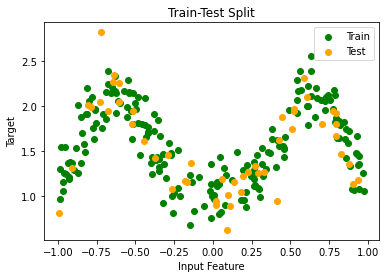

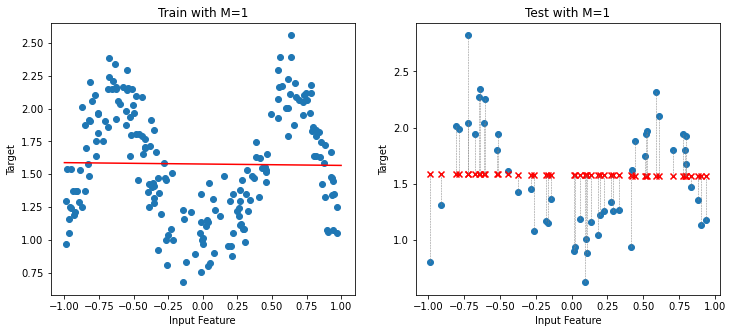

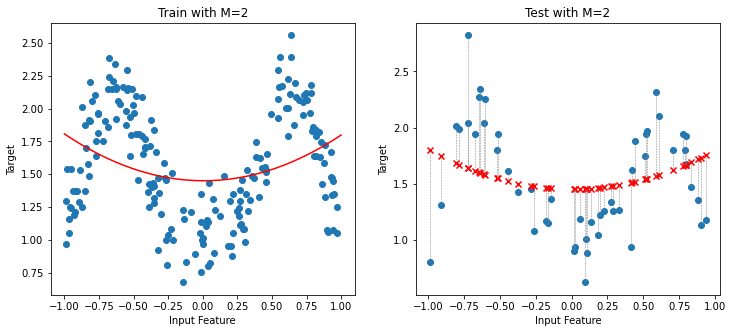

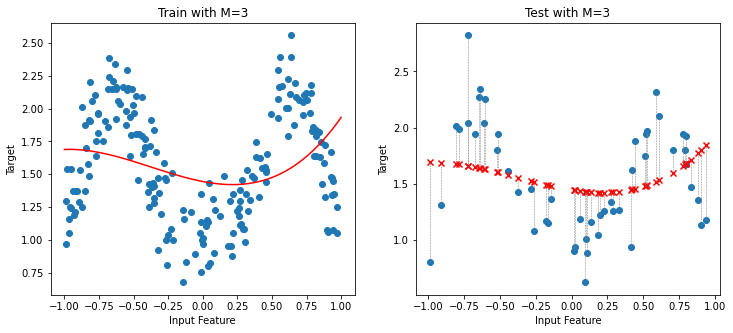

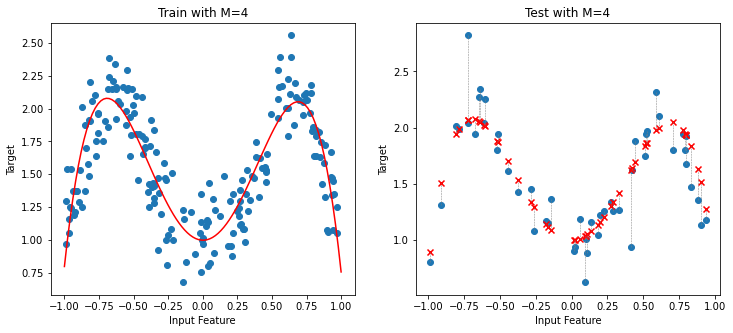

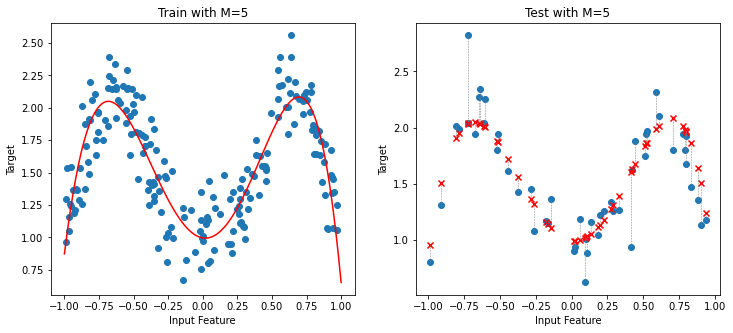

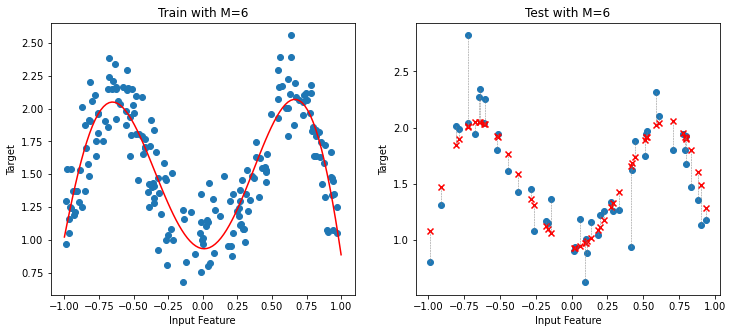

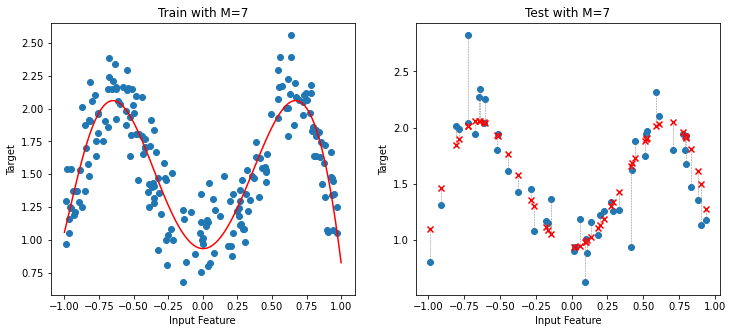

In [10]:
# split dataset into train and test
train_df, test_df = train_test_split(df, seed=42)

# show train and test data in a scatter plot
plt.scatter(train_df['input_feature'], train_df['target'], label='Train', color='green')
plt.scatter(test_df['input_feature'], test_df['target'], label='Test', color='orange')
plt.legend()
plt.title('Train-Test Split')
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.show()

"""
    * M (int): the degree of the polynomial to be fitted
    * W (np.array): the weights (coefficients of the polynomial), it has M+1 elements
"""
for M in range(1,8):
    # W = fit_linear_regression(train_df['input_feature'].values, train_df['target'].values, M)
    poly_reg = PolynomialRegression(M)
    poly_reg.fit_linear_regression(train_df['input_feature'].values, train_df['target'].values)
    # print(f'W{M} = {W}')

    # train
    x = np.linspace(-1.1, 1.1, 100)
    y = poly_reg.predict(x)
    
    # test
    y_pred = poly_reg.predict(test_df['input_feature'].values)

    # graphs in subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].scatter(train_df['input_feature'], train_df['target'])
    x = np.linspace(-1, 1, 100)
    y = poly_reg.predict(x)
    axs[0].plot(x, y, color='red')
    axs[0].set_title(f'Train with M={M}')
    axs[0].set_xlabel('Input Feature')
    axs[0].set_ylabel('Target')

    axs[1].scatter(test_df['input_feature'], test_df['target'])
    y_pred = poly_reg.predict(test_df['input_feature'].values)
    for i in range(test_df.shape[0]):
        axs[1].plot([test_df['input_feature'].values[i], test_df['input_feature'].values[i]], [test_df['target'].values[i], y_pred[i]], color='gray', linestyle='--', linewidth=0.5)
    axs[1].scatter(test_df['input_feature'].values, y_pred, color='red', marker='x')
    axs[1].set_title(f'Test with M={M}')
    axs[1].set_xlabel('Input Feature')
    axs[1].set_ylabel('Target')
    
    plt.show()


TRAIN
M(MSE_min) = 22.0 
MSE_min = 0.0353208692452237

TEST
M(MSE_min) = 8.0 
MSE_min = 0.04581651816761068


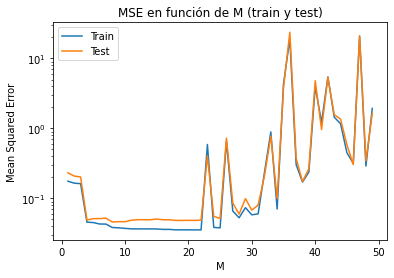

In [11]:
df_mse_train = pd.DataFrame(columns=['M', 'mse'])
df_mse_test = pd.DataFrame(columns=['M', 'mse'])

for M in range(1, len(train_df)//4):
    poly_reg_2 = PolynomialRegression(M)
    W = poly_reg_2.fit_linear_regression(train_df['input_feature'].values, train_df['target'].values)
    # print(f"m={M}: {W}")

    x = np.linspace(-1.2, 1.2, 100)
    y = 0

    s_errors = 0
    for _, row in train_df.iterrows():
        y_pred = sum(W[i] * row['input_feature']**i for i in range(M+1))
        s_errors += (row['target'] - y_pred)**2
        # print(y_pred, end=' ')
    mse = s_errors / len(train_df)
    # print(f"\nMean Squared Error (train): {mse} \n\n")
    df_mse_train = df_mse_train.append({'M': M, 'mse': mse}, ignore_index=True)

    # ahora con el modelo con el dataset de test
    s_errors = 0
    for _, row in test_df.iterrows():
        y_pred = sum(W[i] * row['input_feature']**i for i in range(M+1))
        s_errors += (row['target'] - y_pred)**2
        # print(y_pred, end=' ')
    mse = s_errors / len(test_df)
    # print(f"\nMean Squared Error (test): {mse} \n\n")
    df_mse_test = df_mse_test.append({'M': M, 'mse': mse}, ignore_index=True)

print("TRAIN")
M_opt_train = df_mse_train[df_mse_train['mse'] == df_mse_train['mse'].min()]['M'].values[0]
print(f"M(MSE_min) = {M_opt_train} \nMSE_min = {df_mse_train['mse'].min()}")

print("\nTEST")
M_opt_test = df_mse_test[df_mse_test['mse'] == df_mse_test['mse'].min()]['M'].values[0]
print(f"M(MSE_min) = {M_opt_test} \nMSE_min = {df_mse_test['mse'].min()}")

plt.plot(df_mse_train['M'], df_mse_train['mse'], label='Train')
plt.plot(df_mse_test['M'], df_mse_test['mse'], label='Test')
plt.yscale('log')
plt.title('MSE en función de M (train y test)')
plt.xlabel('M')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()



### c) 
Derivar las ecuaciones para determinar los parámetros óptimos $\bold{w}^∗$ aplicando el principio de máxima verosimilitud, pero en este caso asumiendo además que la incertidumbre en el vector $w$ está dado por la distribución de probabilidad:
$$
P (w) = \Nu(w_0, s^2I)
$$
Donde $\bold{w}_0$ es un vector constante. Es decir, la distribución a-priori (antes de ver los datos) de $\bold{w}_0$ es una Gaussiana de media $\bold{w}$ y co-varianza $s^2I$.

En este caso, resulta:
$$
y = Xw+ \epsilon
$$

Entonces la verosimilitud $L(D|w)$ resulta:

$$
L(D|w)= \prod_{i=1}^M \frac{1}{\sqrt{2\pi \sigma^2}}e^{\frac{-(y_i-x_i^Tw)^2}{2\sigma^2}}
$$

Tomo el logaritmo de la probabilidad $P(w|D)$:

$$
log P(w|D) \propto -\frac{1}{2\sigma^2} \sum_{i=1}^M (y_i-x_i^Tw)^2 - \frac{1}{2s^2}(w-w_0)^T(w-w_0)
$$

Para encontrar el w^* maximizo el logaritmo. Para hacer esto igualo la gradiente a cero: $\nabla_w \ logP(w|D)=0$

Resolviendo esta ecuación resulta:

$$
w^* = (\Phi^T\Phi+\lambda I)^{-1}\cdot(\Phi^TY+\lambda w_0)
$$

### d) 
Reentranar el modelo de regresión polinómica con $M = 20$ y seleccionar un valor adecuado para el parámetro de regularización $\lambda$, donde $\lambda = \frac{\sigma^2}{s^2}$. Mostrar las curvas
de error de entrenamiento y validación que justifiquen su decisión.

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:20<00:00, 48.70it/s]


TRAIN
lambda = 0.0 
MSE = 0.035388639890422624


TEST
lambda = 0.00045045045045045046 
MSE = 0.04498804306740802


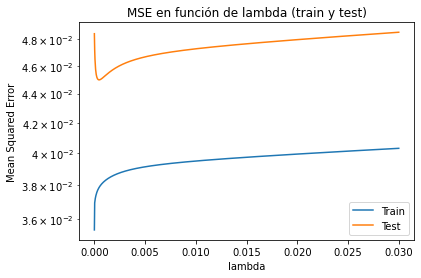

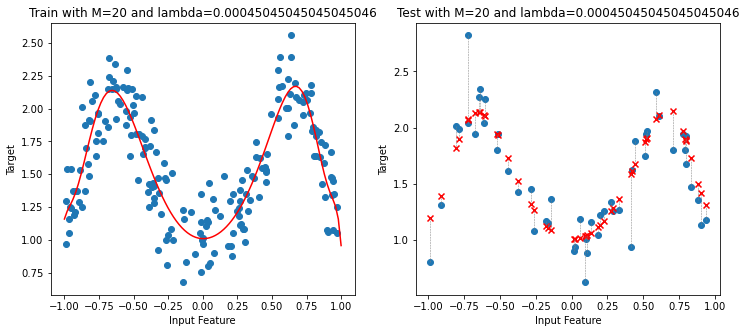

In [15]:
# list of 1000 lambdas linearly distributed between 0 and 0.05 to find the optimal lambda (in terms of MSE) 
lmbda = np.linspace(0, 0.03, 1000) 

df_mse_train = pd.DataFrame(columns=['lambda', 'mse'])
df_mse_test = pd.DataFrame(columns=['lambda', 'mse'])

for l in tqdm.tqdm(lmbda):
    poly_reg_3 = PolynomialRegression(20, lmbda=l)
    W = poly_reg_3.fit_ridge(train_df['input_feature'].values, train_df['target'].values)

    x = np.linspace(-1.2, 1.2, 100)
    y = 0

    s_errors = 0
    for _, row in train_df.iterrows():
        y_pred = sum(W[i] * row['input_feature']**i for i in range(21))
        s_errors += (row['target'] - y_pred)**2
        # print(y_pred, end=' ')
    mse = s_errors / len(train_df)
    # print(f"\nMean Squared Error (train): {mse} \n\n")
    df_mse_train = df_mse_train.append({'lambda': l, 'mse': mse}, ignore_index=True)

    s_errors = 0
    for _, row in test_df.iterrows():
        y_pred = sum(W[i] * row['input_feature']**i for i in range(21))
        s_errors += (row['target'] - y_pred)**2
        # print(y_pred, end=' ')
    mse = s_errors / len(test_df)
    # print(f"\nMean Squared Error (test): {mse} \n\n")
    df_mse_test = df_mse_test.append({'lambda': l, 'mse': mse}, ignore_index=True)

print("TRAIN")

l_opt_train = df_mse_train[df_mse_train['mse'] == df_mse_train['mse'].min()]['lambda'].values[0]
print(f"lambda = {l_opt_train} \nMSE = {df_mse_train['mse'].min()}")


print("\n\nTEST")
l_opt_test = df_mse_test[df_mse_test['mse'] == df_mse_test['mse'].min()]['lambda'].values[0]
print(f"lambda = {l_opt_test} \nMSE = {df_mse_test['mse'].min()}")

plt.plot(df_mse_train['lambda'], df_mse_train['mse'], label='Train')
plt.plot(df_mse_test['lambda'], df_mse_test['mse'], label='Test')
plt.yscale('log')
plt.title('MSE en función de lambda (train y test)')    
plt.xlabel('lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


# plot the best model
poly_reg_opt = PolynomialRegression(20, lmbda=l_opt_test)
W = poly_reg_opt.fit_ridge(train_df['input_feature'].values, train_df['target'].values)

# train
x = np.linspace(-1.1, 1.1, 100)
y = poly_reg_opt.predict(x)

# test
y_pred = poly_reg_opt.predict(test_df['input_feature'].values)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(train_df['input_feature'], train_df['target'])
x = np.linspace(-1, 1, 100)
y = poly_reg_opt.predict(x)
axs[0].plot(x, y, color='red')
axs[0].set_title(f'Train with M=20 and lambda={l_opt_test}')
axs[0].set_xlabel('Input Feature')
axs[0].set_ylabel('Target')

axs[1].scatter(test_df['input_feature'], test_df['target'])
y_pred = poly_reg_opt.predict(test_df['input_feature'].values)

for i in range(test_df.shape[0]):
    axs[1].plot([test_df['input_feature'].values[i], test_df['input_feature'].values[i]], [test_df['target'].values[i], y_pred[i]], color='gray', linestyle='--', linewidth=0.5)
axs[1].scatter(test_df['input_feature'].values, y_pred, color='red', marker='x')
axs[1].set_title(f'Test with M=20 and lambda={l_opt_test}')
axs[1].set_xlabel('Input Feature')
axs[1].set_ylabel('Target')

plt.show()



Tomo el valor $\lambda=0.00045$ que es el que minimiza el $MSE$ en el dataset de testeo. En el código actual se muestran los errores para valores de lambda entre 0 y 0.03, pero se comprobó aparte que para valores mayores solo aumenta el $MSE$, tanto en el entrenamiento como en la validación. 